In [2]:

import numpy as np
import json
from web3 import Web3
import matplotlib.pyplot as plt
import time
ropsten_url = "https://ropsten.infura.io/v3/0345978e22a6431f9222c56ea1f7b6bd"
# quicknode_url ="https://lively-dark-firefly.ropsten.quiknode.pro/e98606c11b422cb244ac923a53d36c5b7ea2c17c"
# ganache_url = \"https://lively-dark-firefly.ropsten.quiknode.pro/e98606c11b422cb244ac923a53d36c5b7ea2c17c/,
# ganache_url ="http://127.0.0.1:8545"
quicknode= "https://lingering-hidden-firefly.ropsten.quiknode.pro/733364d8956c6d1c63ab45a9930226731924938e/"
web3 = Web3(Web3.HTTPProvider(ropsten_url))
web3.isConnected()

True

In [133]:
account1 = "0xdd617f9D5120b7b30E4C502fdd6b13dCf286A300"
private_key1="c00b36dc1777e7fda60ff1f55b57c3f51b18c0c16fe44724e451ed062a173d74"
account2 = "0x8883f1016E727C8fE93C1Df471f102bBbAF2B910"
private_key2="8d70f54549b5fb7c04fc016cc88c447fc81aff3af3065c696aee1b529fbc8ba5"

In [134]:
abi_cont = json.loads('[ { "constant": false, "inputs": [ { "name": "x", "type": "int256[]" }, { "name": "w1", "type": "int256[]" }, { "name": "w2", "type": "int256[]" }, { "name": "w3", "type": "int256[]" }, { "name": "w4", "type": "int256[]" }, { "name": "b1", "type": "int256[]" } ], "name": "multiply_layer1", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": false, "inputs": [ { "name": "l1_output", "type": "int256[]" }, { "name": "w1", "type": "int256[]" }, { "name": "w2", "type": "int256[]" }, { "name": "w3", "type": "int256[]" }, { "name": "w4", "type": "int256[]" }, { "name": "w5", "type": "int256[]" }, { "name": "w6", "type": "int256[]" }, { "name": "w7", "type": "int256[]" }, { "name": "w8", "type": "int256[]" }, { "name": "w9", "type": "int256[]" }, { "name": "w10", "type": "int256[]" }, { "name": "b2", "type": "int256[]" } ], "name": "multiply_layer2", "outputs": [], "payable": false, "stateMutability": "nonpayable", "type": "function" }, { "constant": true, "inputs": [], "name": "print_l1", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" }, { "constant": true, "inputs": [], "name": "print_l2", "outputs": [ { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" }, { "name": "", "type": "int256" } ], "payable": false, "stateMutability": "view", "type": "function" } ]')
cont_address = "0xE2C817C766bce860F9Db21e0b9128A2BfBe230D4"
contract = web3.eth.contract(address=cont_address,abi=abi_cont)

In [135]:
def getlayer1(x,w11,w12,w13,w14,b1,account, pk):
        nonce = web3.eth.getTransactionCount(account)
        start = time.time()
        transaction = contract.functions.multiply_layer1(
            x,w11,w12,w13,w14,b1
             ).buildTransaction({
            'gas': 10000000,
           'gasPrice': web3.toWei('1', 'gwei'),
            'from': account,
           'nonce': nonce
            }) 
        signed_txn = web3.eth.account.signTransaction(transaction, private_key=pk)
        tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
        tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=300)
        end = time.time()
        et = end-start
#         print(et, tx_receipt.gasUsed)
        return (et, tx_receipt.gasUsed)

In [166]:
def getlayer2(l1,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,b2,account1, private_key1):
        nonce = web3.eth.getTransactionCount(account1)
        start = time.time()
        transaction = contract.functions.multiply_layer2(
            l1,w21,w22,w23,w24,w25,w26,w27,w28,w29,w30,b2\
             ).buildTransaction({
            'gas': 4700000,
            'gasPrice': web3.toWei('1', 'gwei'),
            'from': account1,
            'nonce': nonce
            }) 
        signed_txn = web3.eth.account.signTransaction(transaction, private_key=private_key1)
        tx_hash = web3.eth.sendRawTransaction(signed_txn.rawTransaction)
        tx_receipt = web3.eth.waitForTransactionReceipt(tx_hash,timeout=1000)
        end = time.time()
        et = end-start     
        return et,tx_receipt.gasUsed


In [137]:
x = np.arange(1,800).tolist()
w11 = np.arange(1,800).tolist()
w12 = np.arange(1,800).tolist()
w13 = np.arange(1,800).tolist()
w14 = np.arange(1,800).tolist()
b1 = np.arange(1,5).tolist()

In [138]:
 m,n = getlayer1(x,w11,w12,w13,w14,b1,account1, private_key1)

In [139]:
print(m,n)

27.105311393737793 1859845


In [143]:
et_time = []
tx_gas = []
for i in range(5,800,5):
    x = np.arange(1,i).tolist()
    w11 = np.arange(1,i).tolist()
    w12 = np.arange(1,i).tolist()
    w13 = np.arange(1,i).tolist()
    w14 = np.arange(1,i).tolist()
    b1 = np.arange(1,5).tolist()
    if i%2==0:
        account = account1
        private_key = private_key1
    else:
        account = account2
        private_key = private_key2
    m,n = getlayer1(x,w11,w12,w13,w14,b1,account, private_key)
    print(i)
    et_time.append(m)
    tx_gas.append(n)
    

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795


In [144]:
for i in range(5,800,5):
    x = np.arange(1,i).tolist()
    w11 = np.arange(1,i).tolist()
    w12 = np.arange(1,i).tolist()
    w13 = np.arange(1,i).tolist()
    w14 = np.arange(1,i).tolist()
    b1 = np.arange(1,5).tolist()
    if i%2==0:
        account = account1
        private_key = private_key1
    else:
        account = account2
        private_key = private_key2
    m,n = getlayer1(x,w11,w12,w13,w14,b1,account, private_key)
    print(i)
    et_time.append(m)
    tx_gas.append(n)

[27.721763134002686, 23.646764278411865, 12.105449199676514, 12.133545160293579, 36.20037126541138, 11.628842830657959, 23.59062170982361, 25.031692028045654, 23.020813703536987, 36.20099186897278, 12.32586407661438, 11.527766942977905, 36.370564222335815, 24.42132329940796, 11.367441415786743, 11.763712644577026, 11.866875171661377, 24.469509840011597, 11.671669483184814, 36.09413504600525, 23.329335927963257, 24.76391863822937, 59.086495876312256, 12.044524669647217, 23.672028064727783, 24.172168016433716, 12.181196689605713, 12.021199941635132, 23.817946672439575, 11.936014652252197, 35.95573377609253, 12.499903202056885, 11.128231048583984, 12.665635347366333, 23.164722442626953, 24.007957935333252, 12.045453071594238, 12.48450493812561, 23.35811948776245, 23.9942843914032, 24.695435762405396, 23.111553192138672, 12.055594444274902, 12.040404796600342, 23.985801219940186, 11.946207284927368, 11.78292965888977, 23.839818954467773, 24.31745743751526, 23.86566734313965, 23.58625650405

In [146]:
print(tx_gas)

[55618, 66556, 77532, 88486, 99431, 110391, 121364, 132329, 143283, 154241, 165236, 176210, 187175, 198154, 209147, 220131, 231105, 242082, 253097, 264091, 275075, 286073, 297086, 308089, 319083, 330079, 341114, 352127, 363131, 374149, 385181, 396204, 407217, 418233, 429287, 440320, 451343, 462381, 473432, 484475, 495508, 506543, 517617, 528669, 539712, 550769, 561840, 572902, 583954, 595009, 606103, 617414, 628776, 640153, 651544, 662926, 674297, 685672, 697085, 708476, 719858, 731254, 742664, 754065, 765457, 776851, 788283, 799694, 811095, 822511, 833941, 845361, 856772, 868186, 879637, 891068, 902488, 913924, 925373, 936813, 948244, 959689, 971160, 982610, 994050, 1005505, 1016974, 1028434, 1039884, 1051336, 1062827, 1074297, 1085756, 1097231, 1108719, 1120198, 1131668, 1143140, 1154650, 1166139, 1177619, 1189113, 1200573, 1212071, 1223560, 1235052, 1246582, 1258090, 1269589, 1281103, 1292630, 1304149, 1315657, 1327168, 1338718, 1350246, 1361764, 1373297, 1384844, 1396382, 1407910, 

In [ ]:
gas_tx = np.array([55618, 66556, 77532, 88486, 99431, 110391, 121364, 132329, 143283, 154241, 165236, 176210, 187175, 198154, 209147, 220131, 231105, 242082, 253097, 264091, 275075, 286073, 297086, 308089, 319083, 330079, 341114, 352127, 363131, 374149, 385181, 396204, 407217, 418233, 429287, 440320, 451343, 462381, 473432, 484475, 495508, 506543, 517617, 528669, 539712, 550769, 561840, 572902, 583954, 595009, 606103, 617414, 628776, 640153, 651544, 662926, 674297, 685672, 697085, 708476, 719858, 731254, 742664, 754065, 765457, 776851, 788283, 799694, 811095, 822511, 833941, 845361, 856772, 868186, 879637, 891068, 902488, 913924, 925373, 936813, 948244, 959689, 971160, 982610, 994050, 1005505, 1016974, 1028434, 1039884, 1051336, 1062827, 1074297, 1085756, 1097231, 1108719, 1120198, 1131668, 1143140, 1154650, 1166139, 1177619, 1189113, 1200573, 1212071, 1223560, 1235052, 1246582, 1258090, 1269589, 1281103, 1292630, 1304149, 1315657, 1327168, 1338718, 1350246, 1361764, 1373297, 1384844, 1396382, 1407910, 1419441, 1431010, 1442557, 1454095, 1465648, 1477214, 1488772, 1500319, 1511870, 1523458, 1535025, 1546583, 1558155, 1569741, 1581318, 1592897, 1604467, 1616075, 1627661, 1639238, 1650830, 1662436, 1674032, 1685619, 1697208, 1708835, 1720442, 1732038, 1743649, 1755274, 1766890, 1778497, 1790045, 1801692, 1813318, 1824934, 1836565, 1848210])

In [173]:
l2_et_time = []
l2_tx_gas = []
for i in range(100):
    x = np.arange(1,5).tolist()
    w11 = np.arange(1,9).tolist()
    w12 = np.arange(1,9).tolist()
    w13 = np.arange(1,9).tolist()
    w14 = np.arange(1,9).tolist()
    w15 = np.arange(1,9).tolist()
    w16 = np.arange(1,9).tolist()
    w17 = np.arange(1,9).tolist()
    w18 = np.arange(1,9).tolist()
    w19 = np.arange(1,9).tolist()
    w20 = np.arange(1,9).tolist()
   
    b1 = np.arange(1,5).tolist()
    if i%2==0:
        account = account1
        private_key = private_key1
    else:
        account = account2
        private_key = private_key2
    m,n = getlayer2(x,w11,w12,w13,w14,w15,w16,w17,w18,w19,w20,b1,account, private_key)
    print(i)
    l2_et_time.append(m)
    l2_tx_gas.append(n)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [148]:
x = np.arange (5,800,5)
len(x)

159

In [180]:
print(l2_et_time)

[13.278287410736084, 12.030297040939331, 11.675178527832031, 24.206419944763184, 24.634825944900513, 23.355300426483154, 11.731033325195312, 24.022648096084595, 12.88306713104248, 10.931336879730225, 12.061542749404907, 35.94607400894165, 23.900384187698364, 23.872010469436646, 12.032183170318604, 23.805408716201782, 12.177907228469849, 23.897867918014526, 47.89114260673523, 12.029633045196533, 35.989256143569946, 11.847207307815552, 23.994913816452026, 11.821916818618774, 35.82396459579468, 12.305331945419312, 24.892991304397583, 10.950788021087646, 11.96789002418518, 24.297106742858887, 11.680827379226685, 23.615991830825806, 12.061473846435547, 24.121471166610718, 11.95800256729126, 12.666926383972168, 11.826174974441528, 23.106646060943604, 24.311225652694702, 12.157381772994995, 35.71613597869873, 11.657932758331299, 11.97405743598938, 12.049508094787598, 12.39872407913208, 11.81193995475769, 11.65514588356018, 12.060413122177124, 11.868220329284668, 23.955609560012817, 24.8868365

In [198]:
l1_time = np.array([27.721763134002686, 23.646764278411865, 12.105449199676514, 12.133545160293579, 36.20037126541138, 11.628842830657959, 23.59062170982361, 25.031692028045654, 23.020813703536987, 36.20099186897278, 12.32586407661438, 11.527766942977905, 36.370564222335815, 24.42132329940796, 11.367441415786743, 11.763712644577026, 11.866875171661377, 24.469509840011597, 11.671669483184814, 36.09413504600525, 23.329335927963257, 24.76391863822937, 59.086495876312256, 12.044524669647217, 23.672028064727783, 24.172168016433716, 12.181196689605713, 12.021199941635132, 23.817946672439575, 11.936014652252197, 35.95573377609253, 12.499903202056885, 11.128231048583984, 12.665635347366333, 23.164722442626953, 24.007957935333252, 12.045453071594238, 12.48450493812561, 23.35811948776245, 23.9942843914032, 24.695435762405396, 23.111553192138672, 12.055594444274902, 12.040404796600342, 23.985801219940186, 11.946207284927368, 11.78292965888977, 23.839818954467773, 24.31745743751526, 23.86566734313965, 23.586256504058838, 25.42763352394104, 10.837882280349731, 11.918875932693481, 12.340194702148438, 23.398473978042603, 12.105973958969116, 12.370277643203735, 23.259895086288452, 12.534232139587402, 35.41006827354431, 12.07666563987732, 12.544043064117432, 11.766282320022583, 35.532920598983765, 13.231366395950317, 10.906111240386963, 11.78230905532837, 24.198493242263794, 11.630330801010132, 12.155713319778442, 12.038211345672607, 23.59954047203064, 23.87000560760498, 12.290046691894531, 12.498222827911377, 23.426614999771118, 23.692830562591553, 24.236475229263306, 12.008330821990967, 11.867076873779297, 23.60409951210022, 23.9436297416687, 24.34491467475891, 24.830525159835815, 23.006932735443115, 23.784624576568604, 12.222764730453491, 23.772868156433105, 12.298104286193848, 12.151400089263916, 11.56095838546753, 11.727113246917725, 12.947237968444824, 23.471136808395386, 23.496078968048096, 23.982257843017578, 25.178884267807007, 23.182517051696777, 24.587389707565308, 11.252515316009521, 11.733926773071289, 23.919410705566406, 24.0899555683136, 12.610394716262817, 23.564602375030518, 23.77081823348999, 47.61550736427307, 23.89806866645813, 36.014169692993164, 23.773306131362915, 13.196959018707275, 22.808074712753296, 23.872292041778564, 36.18897747993469, 12.72636890411377, 11.569590091705322, 35.68737578392029, 12.113741874694824, 23.453444004058838, 24.10652756690979, 11.968339681625366, 24.71070957183838, 11.462870836257935, 12.6222825050354, 34.804587602615356, 12.57011103630066, 11.812387228012085, 24.96277117729187, 23.17506742477417, 13.554508924484253, 21.744345664978027, 12.583868980407715, 12.616889715194702, 11.058950662612915, 12.202733993530273, 35.39987659454346, 36.88664698600769, 35.58890700340271, 24.722922801971436, 22.697269678115845, 12.731792449951172, 12.241801738739014, 11.924112558364868, 23.718350648880005, 24.15102505683899, 11.377663850784302, 12.548288583755493, 34.967751026153564, 12.578717231750488, 24.24454665184021, 11.787439823150635, 12.248382091522217, 10.884920597076416, 23.726935863494873, 35.950931549072266, 12.894312143325806, 22.95820951461792, 61.56447100639343])
sig_time = np.array([15.7216317653656, 12.185706377029419, 11.875604152679443, 24.68474054336548, 23.193710803985596, 24.037120819091797, 11.865059614181519, 12.131330251693726, 12.256814241409302, 23.65399146080017, 23.791367769241333, 12.38520097732544, 24.300382375717163, 23.493525743484497, 23.558468103408813, 11.968196630477905, 37.74487280845642, 10.311692714691162, 11.985351085662842, 23.857876777648926, 11.858047723770142, 23.74618887901306, 13.24117636680603, 11.045901536941528, 11.754707336425781, 11.987876415252686, 11.794509172439575, 24.154526948928833, 23.76992130279541, 24.382835149765015, 11.521234273910522, 36.142282485961914, 24.632686614990234, 35.24980545043945, 12.099816799163818, 11.818191289901733, 23.981590747833252, 23.941569805145264, 11.924564599990845, 23.910276651382446, 11.85408616065979, 12.988980770111084, 23.105865001678467, 24.076512336730957, 11.829683065414429, 11.85720443725586, 11.868118524551392, 12.071688175201416, 11.941426038742065, 11.957083463668823, 11.937126398086548, 12.43433141708374, 23.526094675064087, 23.923073530197144, 12.103507995605469, 13.289391279220581, 22.570826530456543, 12.4427011013031, 11.413496494293213, 35.84472131729126, 23.85922622680664, 24.22237539291382, 11.788383483886719, 24.066526412963867, 12.382481336593628, 23.438762664794922, 12.099588871002197, 23.763786554336548, 23.91135048866272, 24.20943546295166, 11.786804437637329, 11.995546102523804, 23.89532208442688, 12.624319553375244, 23.45878577232361, 25.458645582199097, 22.418201446533203, 11.832364082336426, 12.36536979675293, 11.454024314880371, 23.92004632949829, 11.922491073608398, 24.04114317893982, 25.898353338241577, 10.142707109451294, 36.017329931259155, 23.572156190872192, 12.658447027206421, 11.316971778869629, 24.028280019760132, 11.820772886276245, 24.25172257423401, 11.718186616897583, 11.995171785354614, 24.19908833503723, 24.64664602279663, 11.590232133865356, 11.630621433258057, 11.883595943450928, 23.67881727218628])
l2_time = np.array([13.278287410736084, 12.030297040939331, 11.675178527832031, 24.206419944763184, 24.634825944900513, 23.355300426483154, 11.731033325195312, 24.022648096084595, 12.88306713104248, 10.931336879730225, 12.061542749404907, 35.94607400894165, 23.900384187698364, 23.872010469436646, 12.032183170318604, 23.805408716201782, 12.177907228469849, 23.897867918014526, 47.89114260673523, 12.029633045196533, 35.989256143569946, 11.847207307815552, 23.994913816452026, 11.821916818618774, 35.82396459579468, 12.305331945419312, 24.892991304397583, 10.950788021087646, 11.96789002418518, 24.297106742858887, 11.680827379226685, 23.615991830825806, 12.061473846435547, 24.121471166610718, 11.95800256729126, 12.666926383972168, 11.826174974441528, 23.106646060943604, 24.311225652694702, 12.157381772994995, 35.71613597869873, 11.657932758331299, 11.97405743598938, 12.049508094787598, 12.39872407913208, 11.81193995475769, 11.65514588356018, 12.060413122177124, 11.868220329284668, 23.955609560012817, 24.886836528778076, 34.81330323219299, 23.999452829360962, 38.04665732383728, 22.08134937286377, 23.595860958099365, 24.15215229988098, 24.062053680419922, 11.934481859207153, 24.181253671646118, 11.360478162765503, 36.223440408706665, 11.706735372543335, 24.300827503204346, 23.894070386886597, 11.826899290084839, 12.778361797332764, 35.29642653465271, 23.814944982528687, 23.941249132156372, 12.323870182037354, 23.482107400894165, 12.016193866729736, 11.923975229263306, 23.845316648483276, 12.01047134399414, 12.409530401229858, 23.950125694274902, 11.55325174331665, 24.137016534805298, 11.648755311965942, 23.993396520614624, 23.86981439590454, 24.003180980682373, 24.0201678276062, 11.763826608657837, 23.876150131225586, 24.162734985351562, 35.996525049209595, 23.819981336593628, 24.100173711776733, 11.875454187393188, 12.372087240219116, 11.707759380340576, 12.214048624038696, 23.6951003074646, 23.887354850769043, 24.26708149909973, 36.12304663658142, 11.238611936569214])
soft_time = np.array([14.835530042648315, 24.06520414352417, 24.006142616271973, 11.984691858291626, 11.9080650806427, 24.226805448532104, 24.083243131637573, 24.001973390579224, 12.4498450756073, 11.389252185821533, 11.960666418075562, 24.03543448448181, 36.49055552482605, 11.588168859481812, 12.044418096542358, 23.88220739364624, 12.04860544204712, 24.000183820724487, 23.847105264663696, 12.270127296447754, 23.969586610794067, 12.125899314880371, 11.58250904083252, 24.20037817955017, 11.876938819885254, 11.956545114517212, 12.007409572601318, 12.281390905380249, 23.948253870010376, 12.44886589050293, 23.984344244003296, 23.408418655395508, 12.648542165756226, 11.59658169746399, 23.806191205978394, 24.020767211914062, 12.043122291564941, 24.611401319503784, 11.392988920211792, 12.061436891555786])


pred_time = l1_time[:40]+sig_time[:40]+ l2_time[40]+soft_time

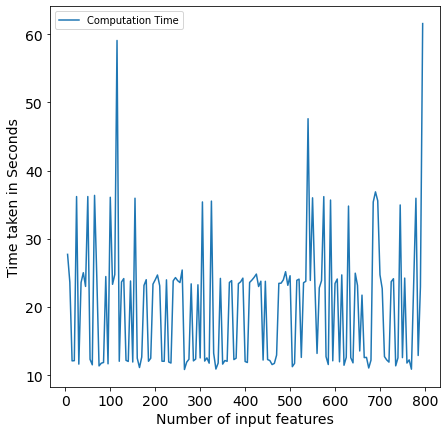

In [150]:
plt.figure(figsize=(7,7))
plt.plot(x,et_time, label = "Computation Time")
plt.ticklabel_format(style='plain')
plt.xlabel("Number of input features",fontsize =14)
plt.ylabel("Time taken in Seconds",fontsize=14)

# plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
# plt.ylabel("Sigmoid Function Output value", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.legend()
plt.savefig("feature-time.pdf", bbox_inches='tight')
plt.show()

In [162]:
sig_time = np.array([15.7216317653656, 12.185706377029419, 11.875604152679443, 24.68474054336548, 23.193710803985596, 24.037120819091797, 11.865059614181519, 12.131330251693726, 12.256814241409302, 23.65399146080017, 23.791367769241333, 12.38520097732544, 24.300382375717163, 23.493525743484497, 23.558468103408813, 11.968196630477905, 37.74487280845642, 10.311692714691162, 11.985351085662842, 23.857876777648926, 11.858047723770142, 23.74618887901306, 13.24117636680603, 11.045901536941528, 11.754707336425781, 11.987876415252686, 11.794509172439575, 24.154526948928833, 23.76992130279541, 24.382835149765015, 11.521234273910522, 36.142282485961914, 24.632686614990234, 35.24980545043945, 12.099816799163818, 11.818191289901733, 23.981590747833252, 23.941569805145264, 11.924564599990845, 23.910276651382446, 11.85408616065979, 12.988980770111084, 23.105865001678467, 24.076512336730957, 11.829683065414429, 11.85720443725586, 11.868118524551392, 12.071688175201416, 11.941426038742065, 11.957083463668823, 11.937126398086548, 12.43433141708374, 23.526094675064087, 23.923073530197144, 12.103507995605469, 13.289391279220581, 22.570826530456543, 12.4427011013031, 11.413496494293213, 35.84472131729126, 23.85922622680664, 24.22237539291382, 11.788383483886719, 24.066526412963867, 12.382481336593628, 23.438762664794922, 12.099588871002197, 23.763786554336548, 23.91135048866272, 24.20943546295166, 11.786804437637329, 11.995546102523804, 23.89532208442688, 12.624319553375244, 23.45878577232361, 25.458645582199097, 22.418201446533203, 11.832364082336426, 12.36536979675293, 11.454024314880371, 23.92004632949829, 11.922491073608398, 24.04114317893982, 25.898353338241577, 10.142707109451294, 36.017329931259155, 23.572156190872192, 12.658447027206421, 11.316971778869629, 24.028280019760132, 11.820772886276245, 24.25172257423401, 11.718186616897583, 11.995171785354614, 24.19908833503723, 24.64664602279663, 11.590232133865356, 11.630621433258057, 11.883595943450928, 23.67881727218628])


In [201]:
from scipy.stats import gamma
x = np.linspace(0,150,150)

# Gamma
shape, loc, scale = gamma.fit(l1_time, floc=1)
print("parameters of layer 1 computation", shape,  scale)
y2 = gamma.pdf(x, shape, loc, scale)

shape, loc, scale = gamma.fit(sig_time, floc=1)
print("Parameters of sigmoid activation",shape,  scale)
y3 = gamma.pdf(x, shape, loc, scale)

shape, loc, scale = gamma.fit(l2_time, floc=1)
print("parameters of layer 2 computation",shape, scale)
y4 = gamma.pdf(x, shape, loc, scale)

shape, loc, scale = gamma.fit(soft_time, floc=1)
print("parameters of softmax activation",shape, scale)
y5 = gamma.pdf(x, shape, loc, scale)

shape, loc, scale = gamma.fit(pred_time, floc=1)
print("parameters of prediction",shape, scale)
y6 = gamma.pdf(x, shape, loc, scale)

# shape, loc, scale = gamma.fit(c7, floc=1)
# print(shape, scale)
# y7 = gamma.pdf(x, shape, loc, scale)
# plt.title('Fitted Gamma')

# x = np.linspace (0, 40, 100) 
# y8 = stats.gamma.pdf(x, a=5, scale=3)

parameters of layer 1 computation 4.95928897642229 3.873522006283866
Parameters of sigmoid activation 6.21427647193293 2.7725840041233867
parameters of layer 2 computation 5.326021222509227 3.522501304249139
parameters of softmax activation 6.870049318100907 2.442085079828457
parameters of prediction 66.13220227438812 1.3984052232128439


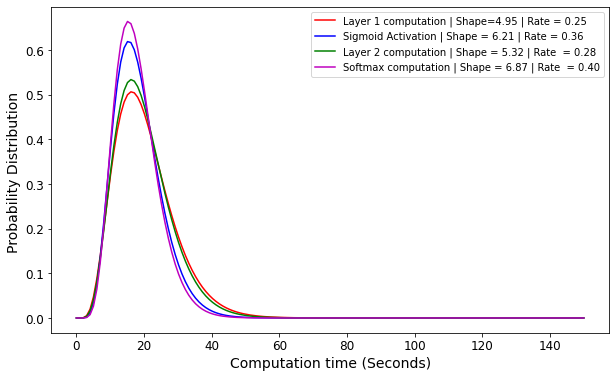

In [207]:
plt.figure(figsize=(10,6))
plt.plot(x, y2*10,label='Layer 1 computation | Shape=4.95 | Rate = 0.25',color ="r")
plt.plot(x, y3*10,label='Sigmoid Activation | Shape = 6.21 | Rate = 0.36',color ="b")
plt.plot(x, y4*10,label='Layer 2 computation | Shape = 5.32 | Rate  = 0.28',color ="g")
plt.plot(x, y5*10,label='Softmax computation | Shape = 6.87 | Rate  = 0.40',color ="m")
# plt.plot(x, y6*10,label='Prediction time | Shape = 66.13 | Rate  = 0.71',color ="c")
# plt.plot(x, y5,label='5-Class',color ="c")
# plt.plot(x, y6,label='6-Class',color ="m")
# plt.plot(x, y7,label='7-Class',color ="k")
plt.legend()
plt.xlabel("Computation time (Seconds)",fontsize = 14)
plt.ylabel("Probability Distribution ",fontsize = 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
plt.savefig('Gamma-functions.pdf',bbox_inches='tight')
plt.show()

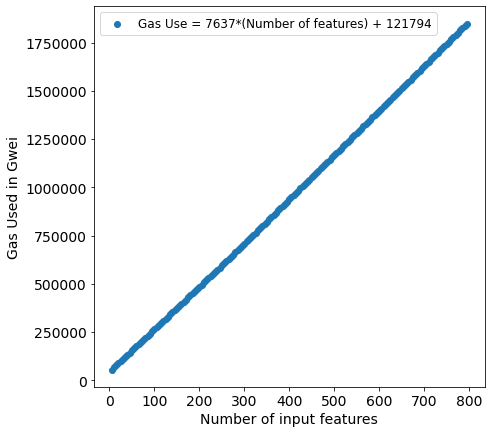

In [14]:
x = np.arange (5,800,5)
len(x)
gas_tx = np.array([55618, 66556, 77532, 88486, 99431, 110391, 121364, 132329, 143283, 154241, 165236, 176210, 187175, 198154, 209147, 220131, 231105, 242082, 253097, 264091, 275075, 286073, 297086, 308089, 319083, 330079, 341114, 352127, 363131, 374149, 385181, 396204, 407217, 418233, 429287, 440320, 451343, 462381, 473432, 484475, 495508, 506543, 517617, 528669, 539712, 550769, 561840, 572902, 583954, 595009, 606103, 617414, 628776, 640153, 651544, 662926, 674297, 685672, 697085, 708476, 719858, 731254, 742664, 754065, 765457, 776851, 788283, 799694, 811095, 822511, 833941, 845361, 856772, 868186, 879637, 891068, 902488, 913924, 925373, 936813, 948244, 959689, 971160, 982610, 994050, 1005505, 1016974, 1028434, 1039884, 1051336, 1062827, 1074297, 1085756, 1097231, 1108719, 1120198, 1131668, 1143140, 1154650, 1166139, 1177619, 1189113, 1200573, 1212071, 1223560, 1235052, 1246582, 1258090, 1269589, 1281103, 1292630, 1304149, 1315657, 1327168, 1338718, 1350246, 1361764, 1373297, 1384844, 1396382, 1407910, 1419441, 1431010, 1442557, 1454095, 1465648, 1477214, 1488772, 1500319, 1511870, 1523458, 1535025, 1546583, 1558155, 1569741, 1581318, 1592897, 1604467, 1616075, 1627661, 1639238, 1650830, 1662436, 1674032, 1685619, 1697208, 1708835, 1720442, 1732038, 1743649, 1755274, 1766890, 1778497, 1790045, 1801692, 1813318, 1824934, 1836565, 1848210])
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(x,gas_tx, label = "Gas Use = 7637*(Number of features) + 121794",marker='o')
plt.ticklabel_format(style='plain')
plt.xlabel("Number of input features",fontsize =14)
plt.ylabel("Gas Used in Gwei",fontsize=14)

# plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
# plt.ylabel("Sigmoid Function Output value", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.legend(fontsize=12)
plt.savefig("feature-gas-layer1.pdf", bbox_inches='tight')
plt.show()

In [ ]:
print(x,',',w1,',',w2,',',w3,',',w4,',',w5,',',b1)

In [ ]:
x = np.arange(1,5).tolist()
w1 = np.arange(1,5).tolist()
w2 = np.arange(1,5).tolist()
w3 = np.arange(1,5).tolist()
w4 = np.arange(1,5).tolist()
w5 = np.arange(1,5).tolist()
w6 = np.arange(1,5).tolist()
w7 = np.arange(1,5).tolist()
w8 = np.arange(1,5).tolist()
w9 = np.arange(1,5).tolist()
w10 = np.arange(1,5).tolist()
b2 = np.arange(1,11).tolist()

In [6]:
# y = 7637*x + 121794
import numpy as np
y= []
x = np.array([100,200,300,400,500,600,700,800])
for item in x:
     y.append(7637*item + 121794)

In [28]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

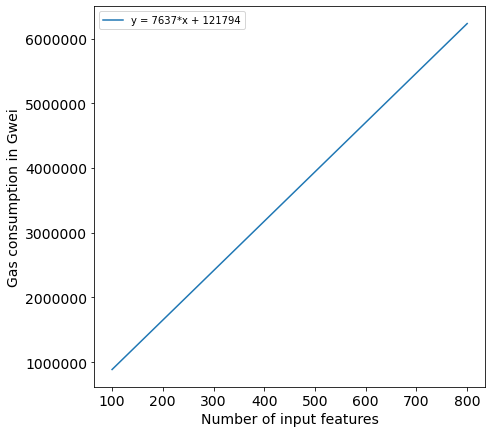

In [33]:
plt.figure(figsize=(7,7))
lab = 'y = 7637*x + 121794'
plt.plot(x,y, label = lab)
plt.ticklabel_format(style='plain')
plt.xlabel("Number of input features",fontsize =14)
plt.ylabel("Gas consumption in Gwei",fontsize=14)

# plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
# plt.ylabel("Sigmoid Function Output value", fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.legend()
plt.savefig("feature-gas.pdf", bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.plot(d, sig_b, label = "Library Function Output")
plt.plot(d, sig_e, label = "Smart Contract Output")
plt.xlabel("Values of x ranging from -5.0 to 5.0", fontsize=14)
plt.ylabel("Sigmoid Function Output value", fontsize=14)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
# plt.title("Sigmoid Value With Smart Contract Function")
plt.legend()
plt.savefig("sigmoid_output.pdf", bbox_inches='tight')
plt.show()

In [40]:

w1 = np.arange(1,11).tolist()


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
gas_ganache = [49542,75799,106890,142930,179604,221295,266388,315014,367173,422768]
gas_ropsten = 
ether_ropsten = [0.000127  ,.00191485]